<a href="https://colab.research.google.com/github/georgethedeveloper77/2spree/blob/main/netflix_stock_feb52021_feb52022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving NFLX.csv to NFLX.csv


In [3]:
#Store the data into a data frame
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,552.260010,554.440002,545.479980,550.789978,550.789978,2376200
1,2021-02-08,555.000000,555.000000,543.700012,547.919983,547.919983,2791700
2,2021-02-09,546.000000,566.000000,543.000000,559.070007,559.070007,3703500
3,2021-02-10,562.500000,566.650024,553.460022,563.590027,563.590027,3991300
4,2021-02-11,564.440002,565.929993,554.219971,557.590027,557.590027,2730600
5,2021-02-12,556.940002,561.250000,550.849976,556.520020,556.520020,2197100


In [4]:
#Get the number of trading days
df.shape

(253, 7)

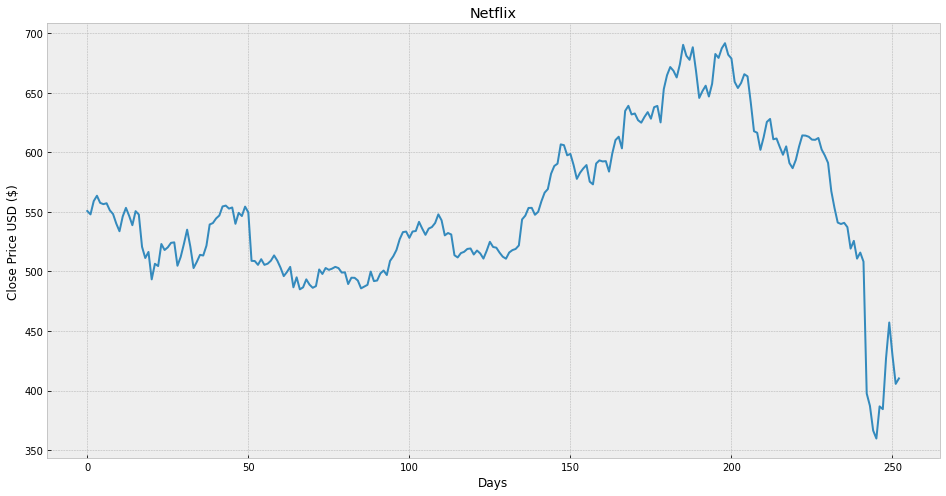

In [6]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [9]:
#Get the close Price
df = df[['Close']]
df.head(4)

,Close
0,550.789978
1,547.919983
2,559.070007
3,563.590027


In [11]:
#Create a varible to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
249,457.130005,NaN
250,429.480011,NaN
251,405.600006,NaN
252,410.170013,NaN


In [12]:
#Create the feature data set (x) and convert it to a numpy and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[550.789978]
 [547.919983]
 [559.070007]
 [563.590027]
 [557.590027]
 [556.52002 ]
 [557.280029]
 [551.340027]
 [548.219971]
 [540.219971]
 [533.780029]
 [546.150024]
 [553.409973]
 [546.700012]
 [538.849976]
 [550.640015]
 [547.820007]
 [520.700012]
 [511.290009]
 [516.390015]
 [493.329987]
 [506.440002]
 [504.540009]
 [523.059998]
 [518.02002 ]
 [520.25    ]
 [524.030029]
 [524.440002]
 [504.790009]
 [512.179993]
 [523.109985]
 [535.090027]
 [520.809998]
 [502.859985]
 [508.049988]
 [513.950012]
 [513.390015]
 [521.659973]
 [539.419983]
 [540.669983]
 [544.530029]
 [546.98999 ]
 [554.580017]
 [555.309998]
 [552.780029]
 [553.72998 ]
 [540.02002 ]
 [549.219971]
 [546.539978]
 [554.440002]
 [549.570007]
 [508.899994]
 [508.779999]
 [505.549988]
 [510.299988]
 [505.549988]
 [506.519989]
 [509.      ]
 [513.469971]
 [509.109985]
 [503.179993]
 [496.079987]
 [499.549988]
 [503.839996]
 [486.690002]
 [495.079987]
 [484.980011]
 [486.660004]
 [493.369995]
 [488.940002]
 [486.279999]
 [487.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [14]:
#Create the target data set (y) and convert it to a numpy and get all of the target values except the last 'x' rows
y = np.array(df['Prediction'])[: - future_days]
print(y)

[520.25     524.030029 524.440002 504.790009 512.179993 523.109985
 535.090027 520.809998 502.859985 508.049988 513.950012 513.390015
 521.659973 539.419983 540.669983 544.530029 546.98999  554.580017
 555.309998 552.780029 553.72998  540.02002  549.219971 546.539978
 554.440002 549.570007 508.899994 508.779999 505.549988 510.299988
 505.549988 506.519989 509.       513.469971 509.109985 503.179993
 496.079987 499.549988 503.839996 486.690002 495.079987 484.980011
 486.660004 493.369995 488.940002 486.279999 487.700012 501.670013
 497.890015 502.899994 501.339996 502.359985 503.859985 502.809998
 499.079987 499.23999  489.429993 494.73999  494.660004 492.390015
 485.809998 487.269989 488.769989 499.890015 491.899994 492.410004
 498.339996 500.769989 497.       508.820007 512.73999  518.059998
 527.070007 533.030029 533.5      528.210022 533.539978 533.97998
 541.640015 535.960022 530.76001  535.97998  537.309998 540.679993
 547.950012 542.950012 530.309998 532.280029 531.049988 513.630

In [ ]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fir(x_train,y_train)

In [16]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[: -future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [17]:
#Show the model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

NameError: ignored